# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Import data

In [4]:
df = pd.read_csv('Car Data.csv')
df.head()

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [5]:
df.shape

(46022, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           46022 non-null  int64 
 1   Company Name         46022 non-null  object
 2   Model Name           46022 non-null  object
 3   Price                46022 non-null  int64 
 4   Model Year           46022 non-null  int64 
 5   Location             46022 non-null  object
 6   Mileage              46022 non-null  int64 
 7   Engine Type          46022 non-null  object
 8   Engine Capacity      46022 non-null  int64 
 9   Color                46022 non-null  object
 10  Assembly             46022 non-null  object
 11  Body Type            46022 non-null  object
 12  Transmission Type    46022 non-null  object
 13  Registration Status  46022 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [7]:
df.describe(include = 'all')

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
count,46022.000000,46022,46022,4.602200e+04,46022.000000,46022,46022.000000,46022,46022.000000,46022,46022,46022,46022,46022
unique,NaN,31,196,NaN,NaN,6,NaN,3,NaN,24,2,6,2,2
top,NaN,Suzuki,Corolla,NaN,NaN,Punjab,NaN,Petrol,NaN,White,Local,Hatchback,Manual,Registered
freq,NaN,15944,8198,NaN,NaN,24732,NaN,43590,NaN,17588,31210,21576,24611,42693
mean,23010.526205,NaN,NaN,2.014153e+06,2011.035374,NaN,90965.128243,NaN,1313.115575,NaN,NaN,NaN,NaN,NaN
std,13285.595581,NaN,NaN,2.939071e+06,6.399403,NaN,63656.656034,NaN,614.690832,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,1.110000e+05,1990.000000,NaN,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,NaN
25%,11505.250000,NaN,NaN,8.500000e+05,2007.000000,NaN,48899.500000,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN
50%,23010.500000,NaN,NaN,1.450000e+06,2013.000000,NaN,80000.000000,NaN,1300.000000,NaN,NaN,NaN,NaN,NaN
75%,34515.750000,NaN,NaN,2.300000e+06,2016.000000,NaN,120000.000000,NaN,1500.000000,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [9]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [10]:
df.isnull().sum()

Company Name           0
Model Name             0
Price                  0
Model Year             0
Location               0
Mileage                0
Engine Type            0
Engine Capacity        0
Color                  0
Assembly               0
Body Type              0
Transmission Type      0
Registration Status    0
dtype: int64

In [11]:
df.duplicated().sum()

815

In [12]:
# Dataframe with duplicate values
df[df.duplicated()].sort_values(by = ['Company Name', 'Model Name', 'Price'])

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
2725,Audi,A3,6900000,2017,Islamabad,40000,Petrol,1800,White,Local,Sedan,Automatic,Registered
32770,Audi,A3,7000000,2019,Punjab,16000,Petrol,1200,Black,Imported,Sedan,Automatic,Registered
26313,Daihatsu,Cast,1150000,2016,Punjab,32000,Petrol,660,Blue,Imported,Hatchback,Automatic,Registered
7940,Daihatsu,Cuore,430000,2003,Punjab,100000,Petrol,800,White,Local,Hatchback,Manual,Registered
44654,Daihatsu,Cuore,450000,2004,Sindh,150000,Petrol,800,Navy,Local,Hatchback,Manual,Registered
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28699,Toyota,Vitz,2275000,2016,Punjab,91000,Petrol,1000,Grey,Imported,Hatchback,Automatic,Un-Registered
44277,Toyota,Vitz,2350000,2016,Punjab,45000,Petrol,1000,White,Imported,Hatchback,Automatic,Un-Registered
42645,Toyota,Vitz,3300000,2017,Sindh,12000,Hybrid,1500,Maroon,Imported,Hatchback,Automatic,Registered
6852,Toyota,Voxy,3900000,2015,Sindh,101000,Hybrid,1500,White,Imported,Mini Van,Automatic,Un-Registered


In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

## Model Name

In [16]:
df.drop(columns = 'Model Name', inplace = True)

## Price

In [18]:
df['Price'] = df['Price'].astype('float')

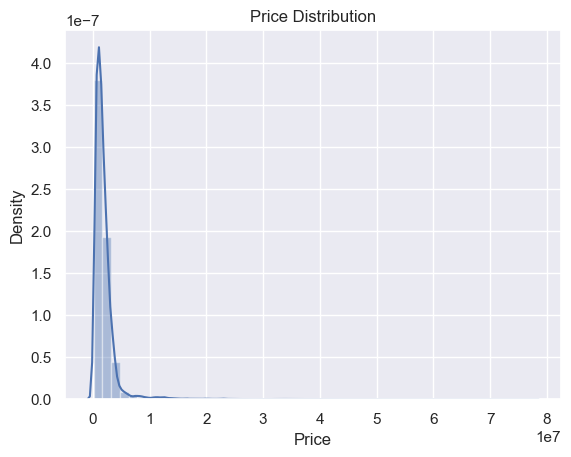

In [19]:
sns.distplot(df['Price'])
plt.title('Price Distribution');

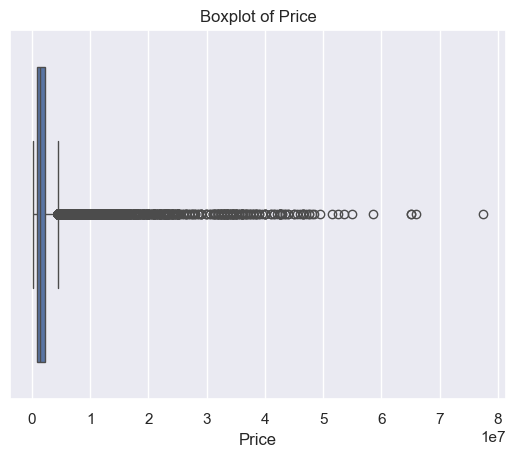

In [20]:
sns.boxplot(x = df['Price'])
plt.title('Boxplot of Price');

In [21]:
df['Price'].describe().apply(lambda x: format(x, 'f'))

count       45207.000000
mean      2021203.331342
std       2957472.684435
min        111000.000000
25%        850000.000000
50%       1450000.000000
75%       2300000.000000
max      77500000.000000
Name: Price, dtype: object

In [22]:
# Removing outliers using IQR
IQR = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
upper_limit = df['Price'].quantile(0.75) + 1.5 * IQR

In [23]:
df = df[df['Price'] < upper_limit]

In [24]:
df['Price'].describe().apply(lambda x: format(x, 'f'))

count      43021.000000
mean     1564464.935729
std       907266.021623
min       111000.000000
25%       815000.000000
50%      1400000.000000
75%      2170000.000000
max      4465000.000000
Name: Price, dtype: object

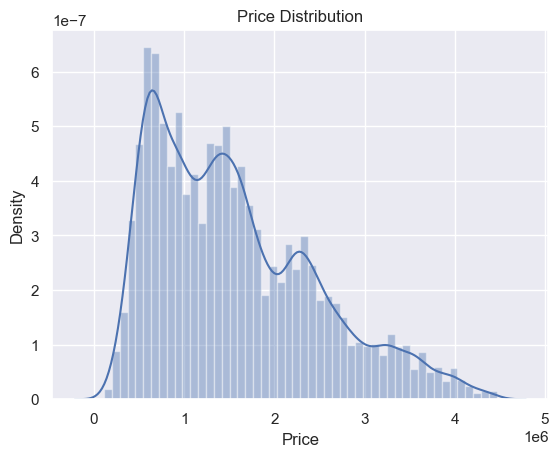

In [25]:
sns.distplot(df['Price'])
plt.title('Price Distribution');

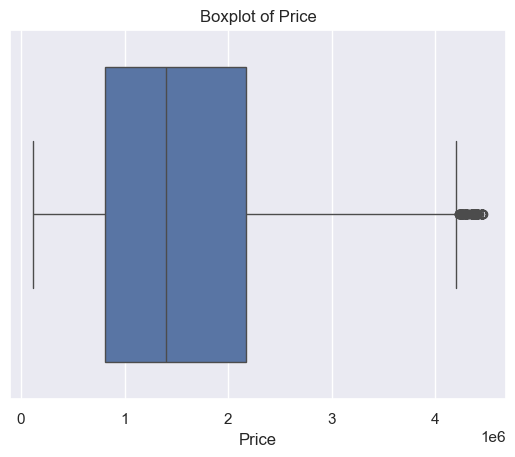

In [26]:
sns.boxplot(x = df['Price'])
plt.title('Boxplot of Price');

In [27]:
df['Price'].skew()

0.7989030168491611

## Mileage

In [29]:
df['Mileage'] = df['Mileage'].astype('float')

In [30]:
df['Mileage'].describe()

count     43021.000000
mean      92624.136143
std       64357.787924
min           1.000000
25%       50000.000000
50%       82000.000000
75%      121000.000000
max      999999.000000
Name: Mileage, dtype: float64

In [31]:
df[df['Mileage'] == 999999]

,Company Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
7390,Honda,670000.0,1996,Punjab,999999.0,Petrol,1500,Green,Local,Sedan,Manual,Registered
11028,Suzuki,445000.0,2006,Sindh,999999.0,Petrol,1000,White,Local,Hatchback,Manual,Registered


In [32]:
df = df[df['Mileage'] != 999999]

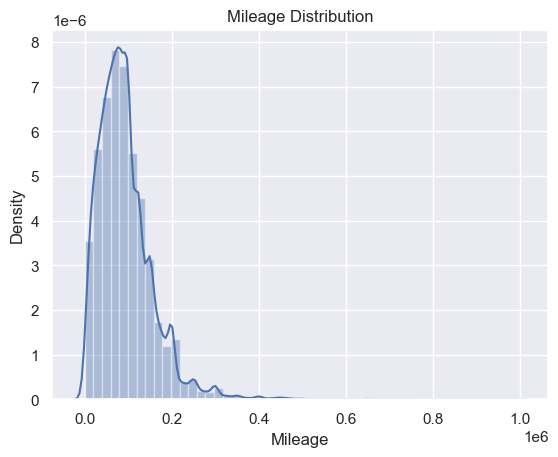

In [33]:
sns.distplot(df['Mileage'])
plt.title('Mileage Distribution');

## Engine Capacity

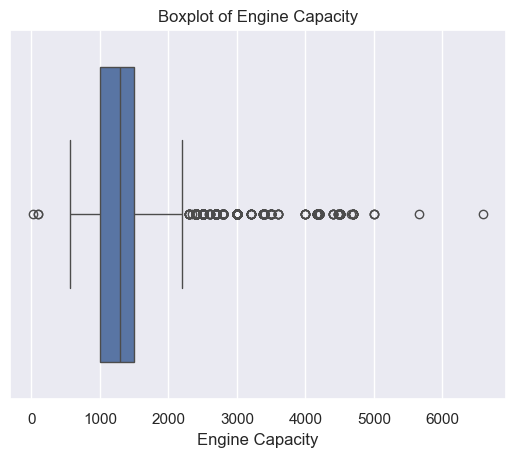

In [35]:
sns.boxplot(x = df['Engine Capacity'])
plt.title('Boxplot of Engine Capacity');

In [36]:
df['Engine Capacity'].skew()

1.845401398594921

In [37]:
df = df[df['Engine Capacity'] < df['Engine Capacity'].quantile(0.99)]

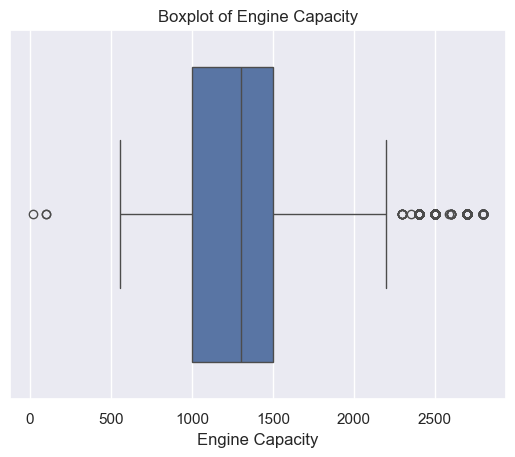

In [38]:
sns.boxplot(x = df['Engine Capacity'])
plt.title('Boxplot of Engine Capacity');

# EDA

## Company Name

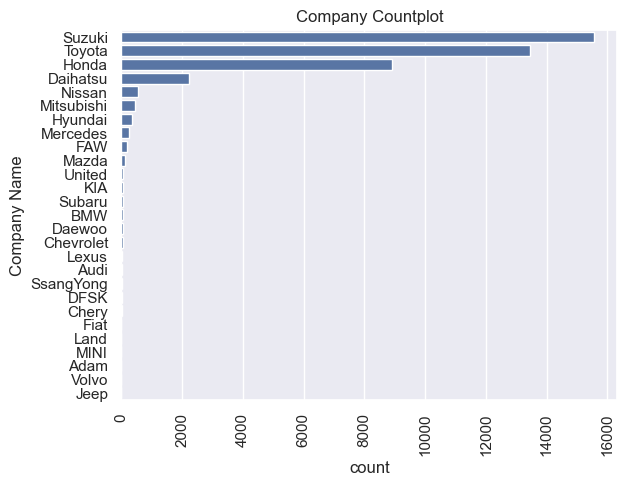

In [41]:
sns.countplot(df['Company Name'], order = df['Company Name'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Company Countplot');

In [42]:
((df['Company Name'].value_counts()*100/len(df)).round(2)).head(10)

Company Name
Suzuki        36.63
Toyota        31.67
Honda         20.95
Daihatsu       5.28
Nissan         1.32
Mitsubishi     1.07
Hyundai        0.84
Mercedes       0.62
FAW            0.44
Mazda          0.28
Name: count, dtype: float64

### Conclusion

- Suzuki, Toyota and Honda have a significant market share by 36%, 31% and 21% respectively.

## Price

In [45]:
df['Price'].describe().apply(lambda x: format(x, 'f'))

count      42450.000000
mean     1550987.773852
std       900893.345080
min       111000.000000
25%       800000.000000
50%      1385000.000000
75%      2150000.000000
max      4465000.000000
Name: Price, dtype: object

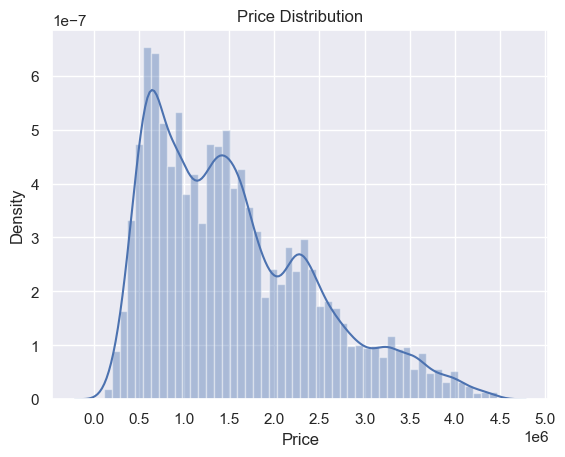

In [46]:
sns.distplot(df['Price'])
plt.title('Price Distribution')
plt.xticks(np.arange(0, 5.1e6, 0.5e6));

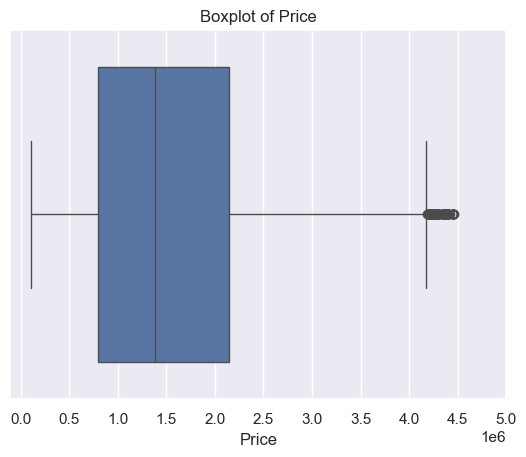

In [47]:
sns.boxplot(x = df['Price'])
plt.title('Boxplot of Price')
plt.xticks(np.arange(0, 5.1e6, 0.5e6));

In [48]:
df['Price'].skew()

0.8155536359145507

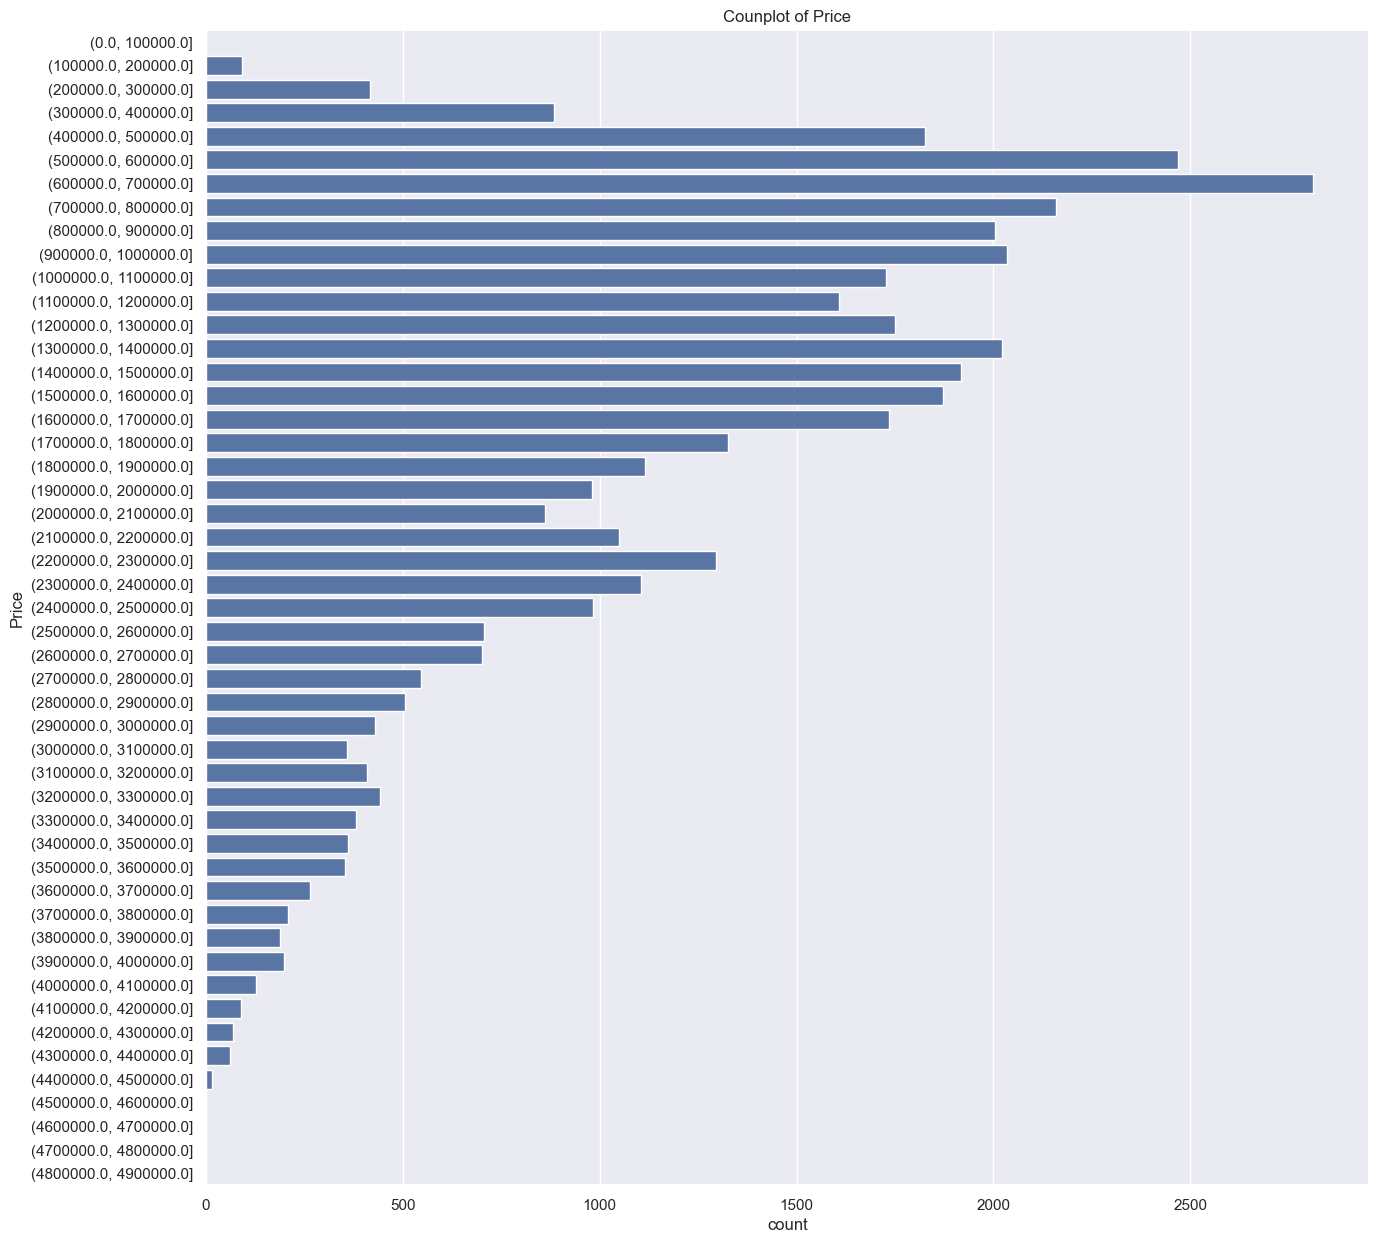

In [49]:
plt.figure(figsize = (15, 15))
sns.countplot(pd.cut(df['Price'], bins = np.arange(0, 5e6, 0.1e6)))
plt.title('Counplot of Price');

In [50]:
1e6

1000000.0

### Conclusion

- The `Price` column has a mean	of 1550987.77 and std 900893.34.
- 40000 - 100000 is the price range with most number of available vehicles.

## Model Year

In [53]:
df['Model Year'].describe()

count    42450.000000
mean      2011.091755
std          6.313755
min       1990.000000
25%       2007.000000
50%       2013.000000
75%       2016.000000
max       2019.000000
Name: Model Year, dtype: float64

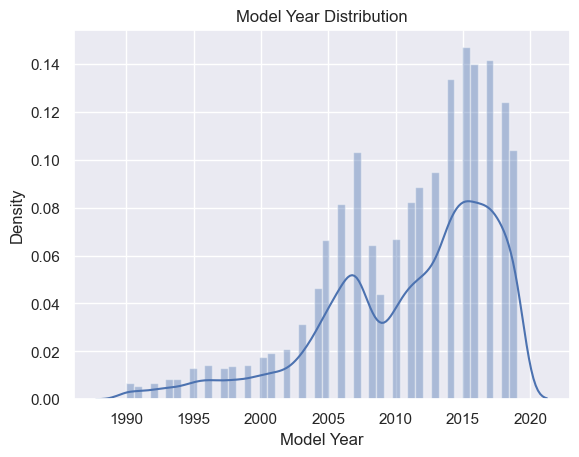

In [54]:
sns.distplot(df['Model Year'])
plt.title('Model Year Distribution');

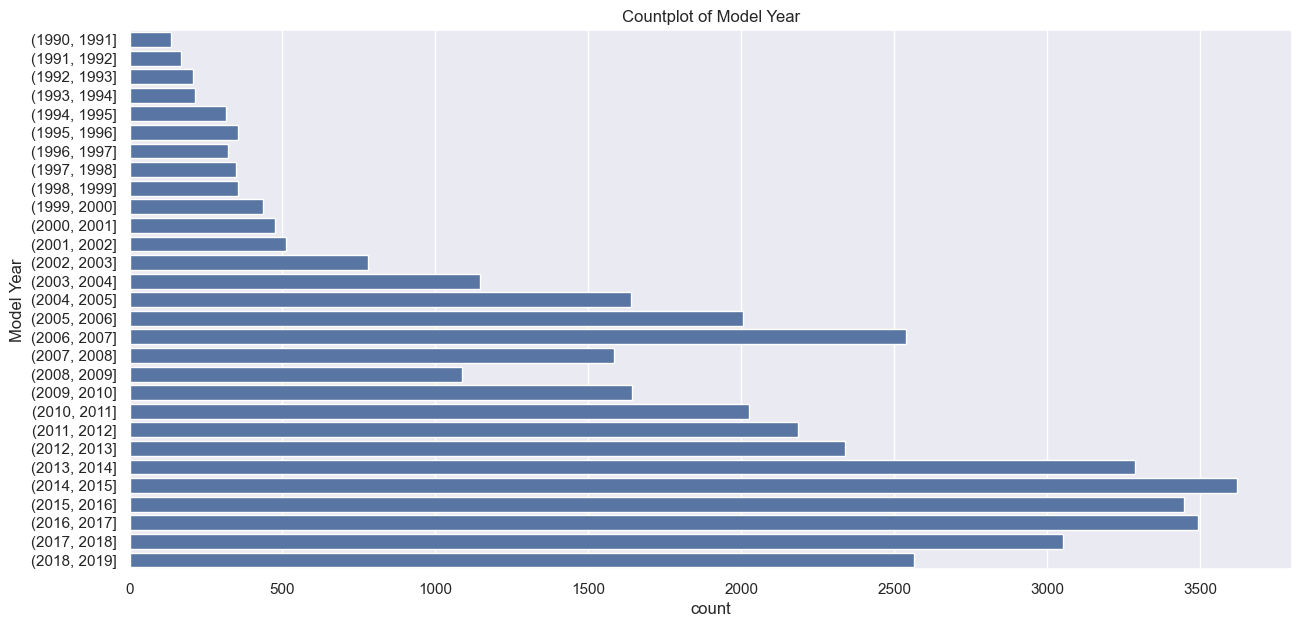

In [55]:
plt.figure(figsize = (15, 7))
sns.countplot(pd.cut(df['Model Year'], bins = np.arange(1990, 2020, 1)))
plt.title('Countplot of Model Year');

### Conclusion

- Majority of the vehicles are from the year 2013 - 2019.

## Location

In [58]:
df['Location'].value_counts()*100/len(df)

Location
Punjab         54.000000
Sindh          18.958775
Islamabad      13.898704
KPK            11.891637
Balochistan     0.706714
Kashmir         0.544170
Name: count, dtype: float64

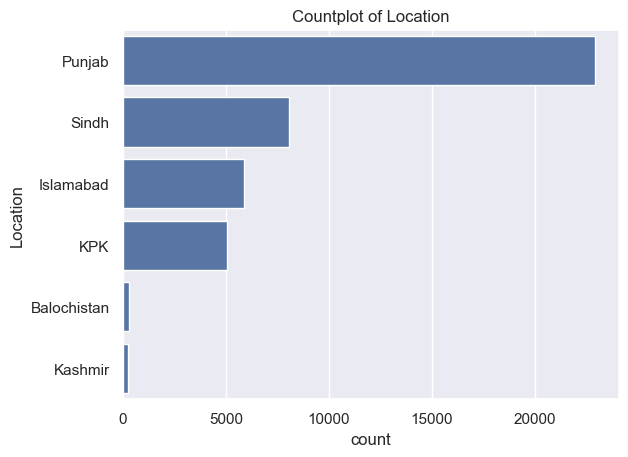

In [59]:
sns.countplot(df['Location'], order = df['Location'].value_counts().index)
plt.title('Countplot of Location');

## Engine Type

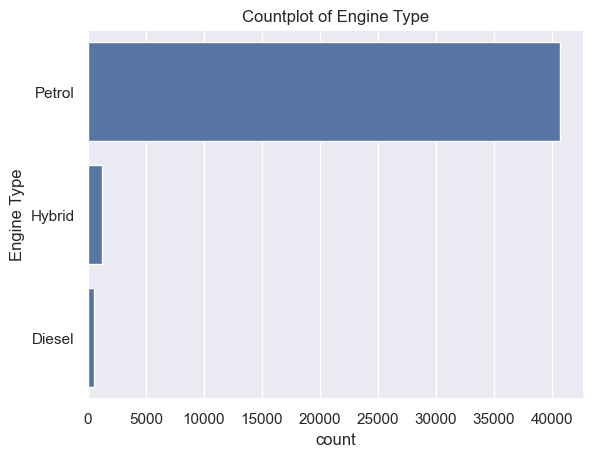

In [61]:
sns.countplot(df['Engine Type'], order = df['Engine Type'].value_counts().index)
plt.title('Countplot of Engine Type');

In [62]:
df['Engine Type'].value_counts()*100/len(df)

Engine Type
Petrol    95.898704
Hybrid     2.925795
Diesel     1.175501
Name: count, dtype: float64

### Conclusion

- Almost 96% vehicles use petrol as fuel.
- 3% are hybrids while 1% use diesel.

## Engine Capacity

In [65]:
df['Engine Capacity'].describe()

count    42450.000000
mean      1210.484287
std        392.005218
min         16.000000
25%       1000.000000
50%       1300.000000
75%       1500.000000
max       2800.000000
Name: Engine Capacity, dtype: float64

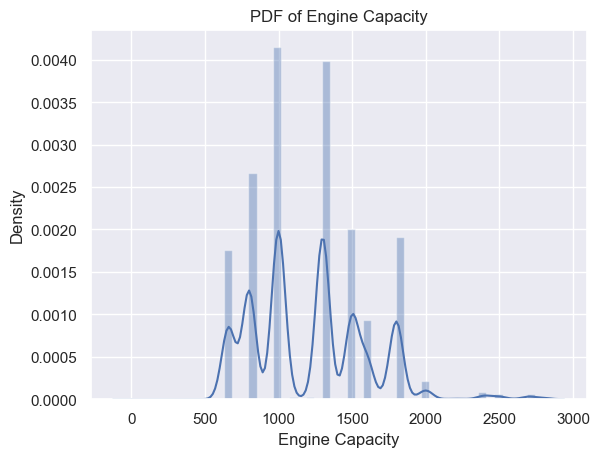

In [66]:
sns.distplot(df['Engine Capacity'])
plt.title('PDF of Engine Capacity');

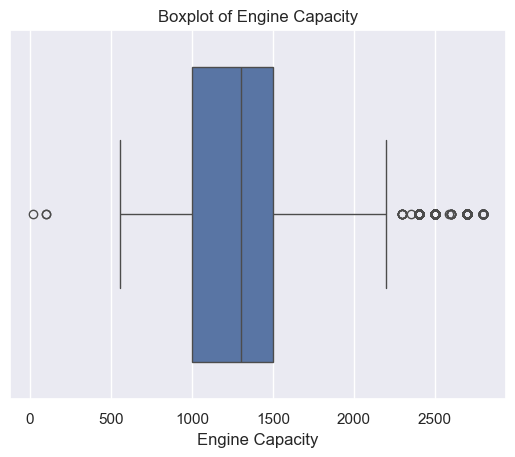

In [67]:
sns.boxplot(x = df['Engine Capacity'])
plt.title('Boxplot of Engine Capacity');

### Conclusion

- The distribution appears to be multimodal.

## Color

In [70]:
df['Color'].value_counts()*100/len(df)

Color
White        37.915194
Silver       17.926973
Black        12.164900
Grey         11.363958
Blue          4.673734
Assembly      3.005889
Gold          2.277974
Maroon        2.051826
Red           1.818610
Green         1.637220
Beige         1.267373
Burgundy      0.683157
Brown         0.588928
Turquoise     0.532391
Bronze        0.478210
Pink          0.449941
Navy          0.247350
Yellow        0.221437
Unlisted      0.219081
Purple        0.193168
Indigo        0.188457
Orange        0.087161
Magenta       0.004711
Wine          0.002356
Name: count, dtype: float64

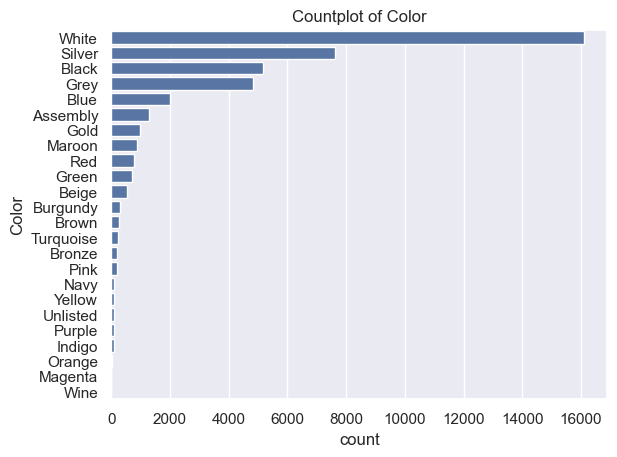

In [71]:
sns.countplot(df['Color'], order = df['Color'].value_counts().index)
plt.title('Countplot of Color');

### Conclusion

- Majority of the vehicles are in White, Silver, Black and Grey color.

## Assembly

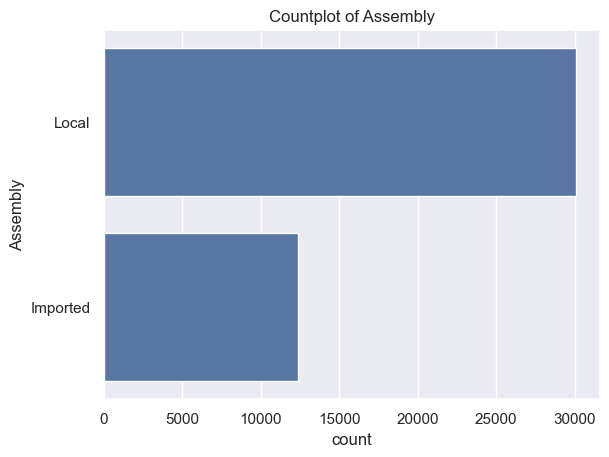

In [74]:
sns.countplot(df['Assembly'], order = df['Assembly'].value_counts().index)
plt.title('Countplot of Assembly');

In [75]:
df['Assembly'].value_counts()*100/len(df)

Assembly
Local       70.899882
Imported    29.100118
Name: count, dtype: float64

### Conclusion

- 71% of the veicles are Local while 29% are imported.

## Body Type

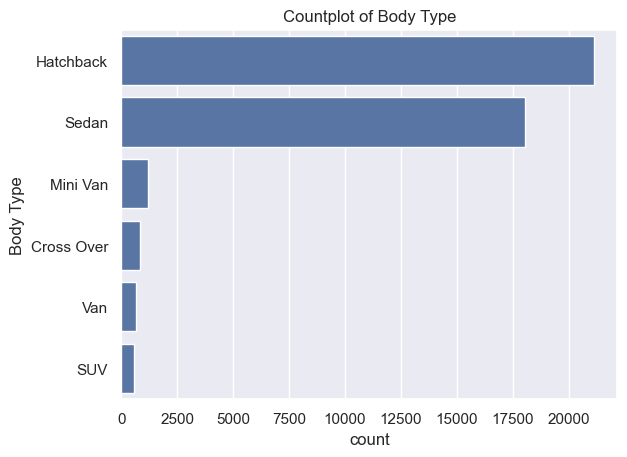

In [78]:
sns.countplot(df['Body Type'], order = df['Body Type'].value_counts().index)
plt.title('Countplot of Body Type');

In [79]:
df['Body Type'].value_counts()*100/len(df)

Body Type
Hatchback     49.750294
Sedan         42.546525
Mini Van       2.765607
Cross Over     2.009423
Van            1.533569
SUV            1.394582
Name: count, dtype: float64

### Conclusion

- 49.7% vehicles are Hatchbacks while 42.5% vehicles are Sedans.
- The rest in low proportions.

## Transmission Type

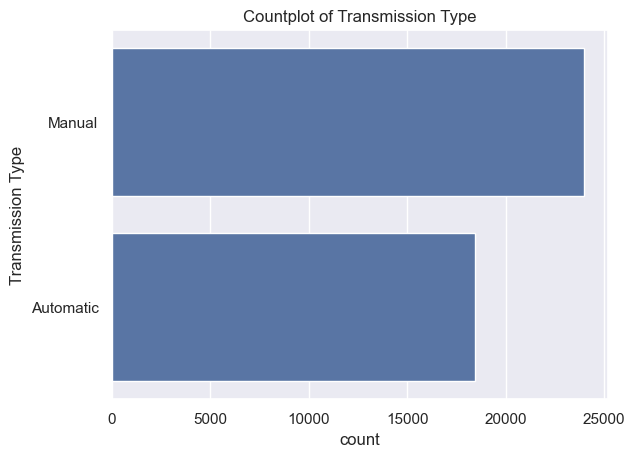

In [82]:
sns.countplot(df['Transmission Type'], order = df['Transmission Type'].value_counts().index)
plt.title('Countplot of Transmission Type');

In [83]:
df['Transmission Type'].value_counts()*100/len(df)

Transmission Type
Manual       56.497055
Automatic    43.502945
Name: count, dtype: float64

### Conclusion

- 56% vehicles have Manual transmission while the rest 44% vehicles have automaic transmission.

## Registration Status

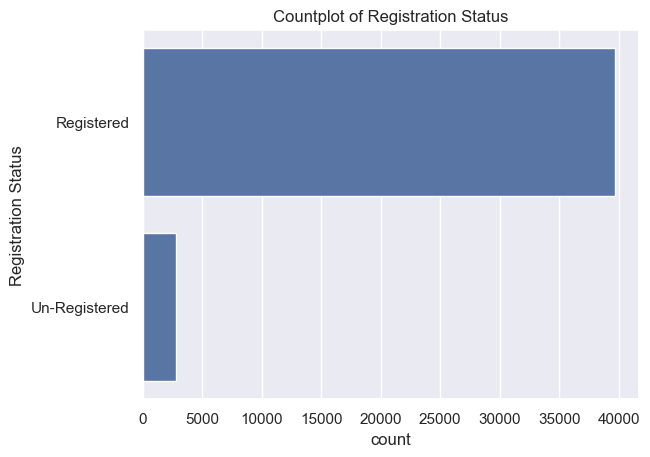

In [86]:
sns.countplot(df['Registration Status'], order = df['Registration Status'].value_counts().index)
plt.title('Countplot of Registration Status');

In [87]:
df['Registration Status'].value_counts()*100/len(df)

Registration Status
Registered       93.436985
Un-Registered     6.563015
Name: count, dtype: float64

### Conclusion

- 93% vehicles are registered while 7% are unregistered.

# Data Preprocessing

## Creating Dummy Variables

In [91]:
df = df.reset_index(drop = True)

In [92]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = 'first', sparse_output = False, dtype = np.int32)

In [93]:
df.select_dtypes('object').columns

Index(['Company Name', 'Location', 'Engine Type', 'Color', 'Assembly',
       'Body Type', 'Transmission Type', 'Registration Status'],
      dtype='object')

In [94]:
ohe_fit = ohe.fit_transform(df[df.select_dtypes('object').columns])
ohe_df = pd.DataFrame(ohe_fit, columns = ohe.get_feature_names_out())
ohe_df.head()

,Company Name_Audi,Company Name_BMW,Company Name_Chery,Company Name_Chevrolet,Company Name_DFSK,Company Name_Daewoo,Company Name_Daihatsu,Company Name_FAW,Company Name_Fiat,Company Name_Honda,...,Color_Wine,Color_Yellow,Assembly_Local,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Manual,Registration Status_Un-Registered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [95]:
df1 = pd.concat([df.select_dtypes('number'), ohe_df], axis = 1)
df1.head()

,Price,Model Year,Mileage,Engine Capacity,Company Name_Audi,Company Name_BMW,Company Name_Chery,Company Name_Chevrolet,Company Name_DFSK,Company Name_Daewoo,...,Color_Wine,Color_Yellow,Assembly_Local,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Manual,Registration Status_Un-Registered
0,2385000.0,2017,9869.0,1000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,111000.0,2019,11111.0,1300,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1530000.0,2019,17500.0,660,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,1650000.0,2019,9600.0,660,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,1435000.0,2010,120000.0,1300,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [96]:
df1.describe()

,Price,Model Year,Mileage,Engine Capacity,Company Name_Audi,Company Name_BMW,Company Name_Chery,Company Name_Chevrolet,Company Name_DFSK,Company Name_Daewoo,...,Color_Wine,Color_Yellow,Assembly_Local,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Manual,Registration Status_Un-Registered
count,4.245000e+04,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,...,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000,42450.000000
mean,1.550988e+06,2011.091755,91755.029965,1210.484287,0.000236,0.001131,0.000188,0.000942,0.000188,0.001131,...,0.000024,0.002214,0.708999,0.497503,0.027656,0.013946,0.425465,0.015336,0.564971,0.065630
std,9.008933e+05,6.313755,63742.629583,392.005218,0.015347,0.033608,0.013727,0.030683,0.013727,0.033608,...,0.004854,0.047006,0.454229,0.500000,0.163987,0.117267,0.494419,0.122886,0.495767,0.247637
min,1.110000e+05,1990.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+05,2007.000000,50000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.385000e+06,2013.000000,80520.500000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.150000e+06,2016.000000,120000.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,4.465000e+06,2019.000000,990000.000000,2800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Heatmap of correlation matrix

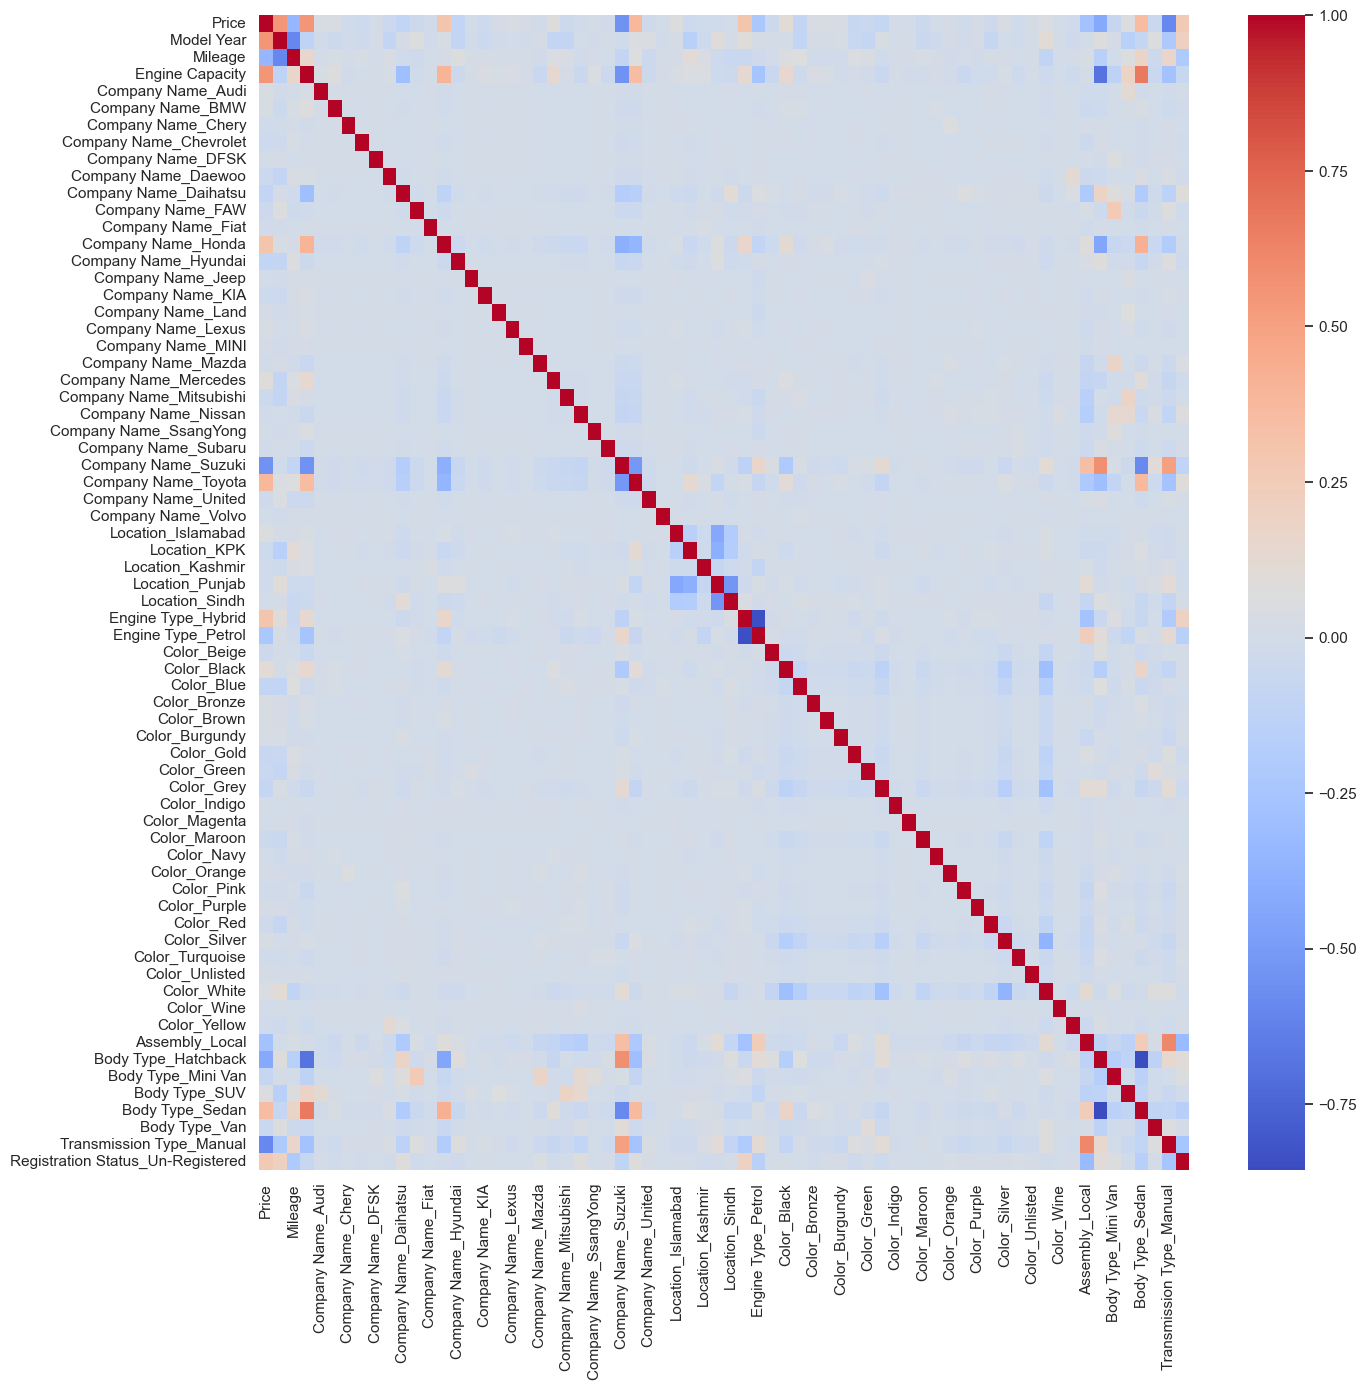

In [98]:
plt.figure(figsize = (15, 15))
sns.heatmap(df1.corr(), cmap = 'coolwarm');

# Declaring Independent and Dependent Variables

In [100]:
x = df1.drop(columns = 'Price')
y = df1['Price']

# Splitting data into train and test

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Model Training

## Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [106]:
lr.fit(x_train, y_train)

LinearRegression()

In [107]:
lr_y_pred = lr.predict(x_test)

In [108]:
residuals = y_test - lr_y_pred

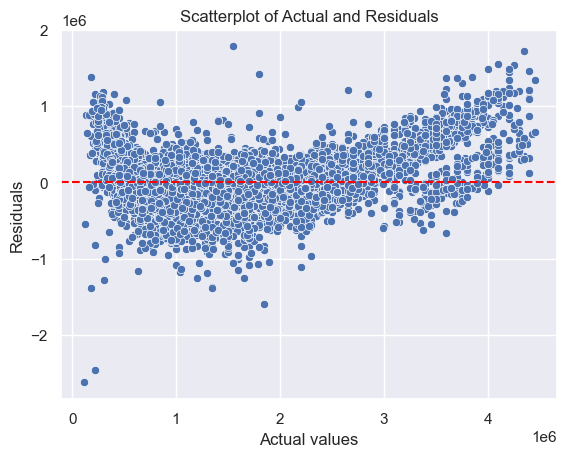

In [109]:
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Scatterplot of Actual and Residuals');

In [110]:
pd.set_option('display.max_rows', None)

In [111]:
pd.DataFrame(data = lr.coef_, columns = ['Coefficients'], index = x.columns)

,Coefficients
Model Year,6.908679e+04
Mileage,-1.197084e+00
Engine Capacity,9.160669e+02
Company Name_Audi,1.449090e+06
Company Name_BMW,9.073303e+05
Company Name_Chery,4.172782e+05
Company Name_Chevrolet,1.647137e+05
Company Name_DFSK,3.540121e+05
Company Name_Daewoo,3.448556e+05
Company Name_Daihatsu,4.971264e+05


### $R^2$ Score

In [113]:
from sklearn.metrics import r2_score

In [114]:
r2 = r2_score(y_test, lr_y_pred)
r2_adj = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x.shape[1] - 1)

print(f'R2 Score: {np.round(r2, 4)}')
print(f'Adjusted R2 Score: {np.round(r2_adj, 4)}')

R2 Score: 0.8754
Adjusted R2 Score: 0.8744


### Cross Val Score

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
lr_cv_score = np.mean(cross_val_score(lr, x_train, y_train, scoring = 'r2', cv = 10))
print(f'cross_val_score (LR): {np.round(lr_cv_score, 4)}')

cross_val_score (LR): 0.8782


### Visualising

In [119]:
from yellowbrick.regressor import PredictionError

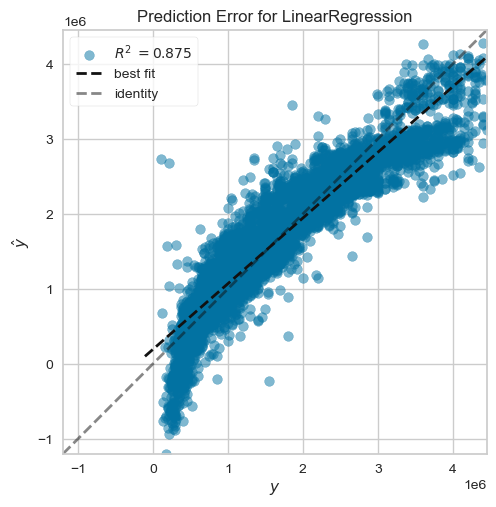

In [120]:
pe = PredictionError(lr, alpha = 0.5)
pe.fit(x_train, y_train)
pe.score(x_test, y_test)
pe.show();

## Transforming target variable

Since the `Price` column is positively skewed, log transformation can be undertaken

In [122]:
print(f'Price skewness: {np.round(y.skew(), 4)}')
print(f'log_price skewness: {np.round((np.log(y)).skew(), 4)}')

Price skewness: 0.8156
log_price skewness: -0.3137


In [123]:
y_train = np.log(y_train)
y_test = np.log(y_test)

## Training with transformed data

In [125]:
lr.fit(x_train, y_train)

LinearRegression()

In [126]:
trf_lr_y_pred = lr.predict(x_test)

In [127]:
residuals = y_test - trf_lr_y_pred

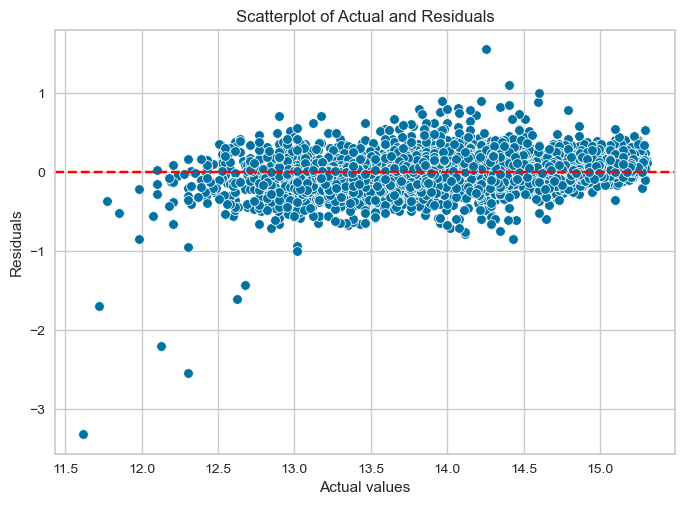

In [128]:
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Scatterplot of Actual and Residuals');

In [129]:
pd.set_option('display.max_rows', None)

In [130]:
pd.DataFrame(data = lr.coef_, columns = ['Coefficients'], index = x.columns)

,Coefficients
Model Year,6.131367e-02
Mileage,-3.392035e-07
Engine Capacity,5.135888e-04
Company Name_Audi,1.505449e+00
Company Name_BMW,1.547821e+00
Company Name_Chery,9.296560e-01
Company Name_Chevrolet,8.046378e-01
Company Name_DFSK,1.057358e+00
Company Name_Daewoo,5.778423e-01
Company Name_Daihatsu,1.197034e+00


### $R^2$ Score

In [132]:
r2 = r2_score(y_test, trf_lr_y_pred)
r2_adj = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x.shape[1] - 1)

print(f'R2 Score: {np.round(r2, 4)}')
print(f'Adjusted R2 Score: {np.round(r2_adj, 4)}')

R2 Score: 0.9106
Adjusted R2 Score: 0.9099


### Cross Val Score

In [134]:
lr_cv_score = np.mean(cross_val_score(lr, x_train, y_train, scoring = 'r2', cv = 10))
print(f'cross_val_score (LR_trf): {np.round(lr_cv_score, 4)}')

cross_val_score (LR_trf): 0.9172


### Visualising

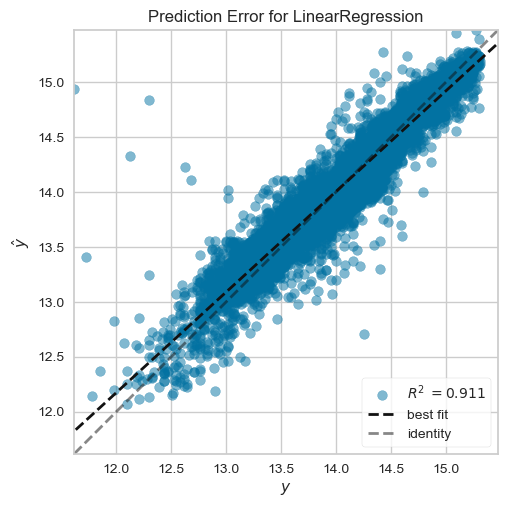

In [136]:
pe = PredictionError(lr, alpha = 0.5)
pe.fit(x_train, y_train)
pe.score(x_test, y_test)
pe.show();

## Decision Tree Regressor

In [138]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
dtr = DecisionTreeRegressor()

In [140]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [141]:
dtr_y_pred = dtr.predict(x_test)

In [142]:
residuals = y_test - dtr_y_pred

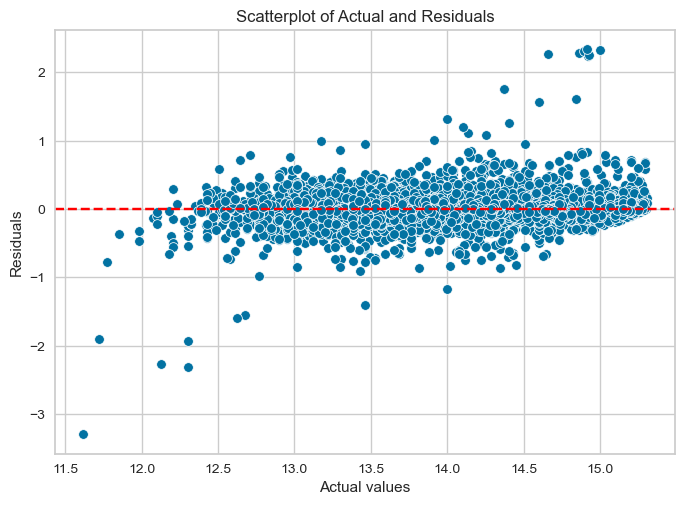

In [143]:
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Scatterplot of Actual and Residuals');

### Cross Val Score

In [145]:
dtr_cv_score = np.mean(cross_val_score(dtr, x_train, y_train, scoring = 'r2', cv = 10))
print(f'Cross Val Score (DTR): {np.round(dtr_cv_score, 4)}')

Cross Val Score (DTR): 0.9225


### Visualising

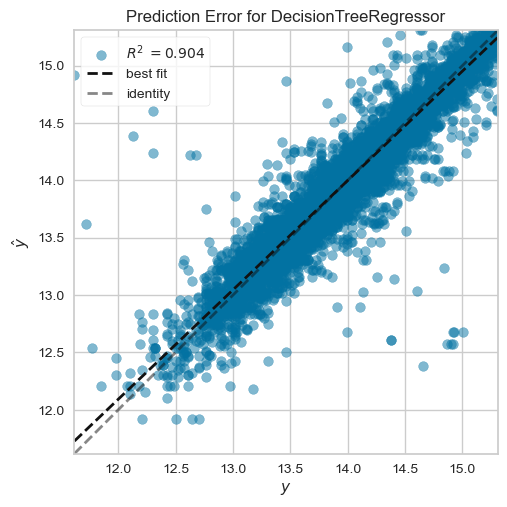

In [147]:
pe = PredictionError(dtr, alpha = 0.5)
pe.fit(x_train, y_train)
pe.score(x_test, y_test)
pe.show();

## Random Forest Regressor

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rfr = RandomForestRegressor()

In [151]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [152]:
rfr_y_pred = rfr.predict(x_test)

In [153]:
residuals = y_test - rfr_y_pred

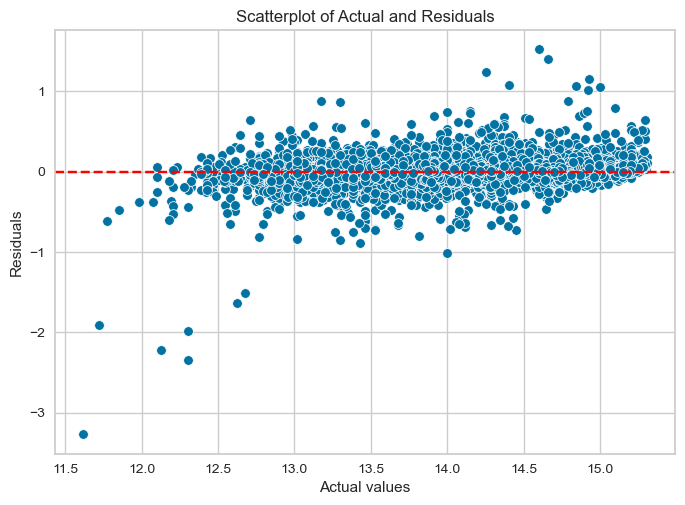

In [154]:
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Scatterplot of Actual and Residuals');

### Cross Val Score

In [156]:
rfr_cv_score = np.mean(cross_val_score(rfr, x_train, y_train, scoring="r2", cv=10))

In [157]:
print(f'Cross Val Score (RFR): {np.round(rfr_cv_score, 4)}')

Cross Val Score (RFR): 0.952


### Visualising

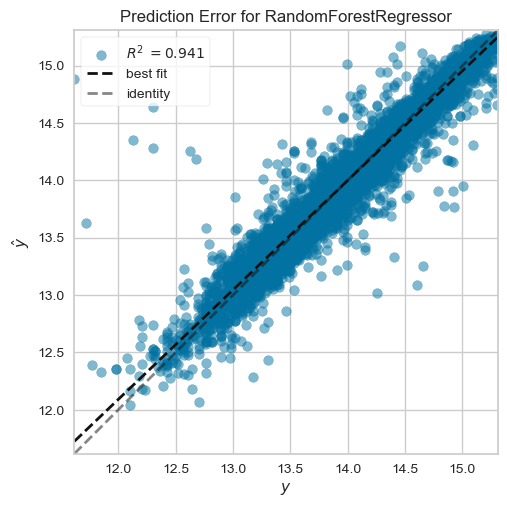

In [159]:
pe = PredictionError(rfr, alpha = 0.5)
pe.fit(x_train, y_train)
pe.score(x_test, y_test)
pe.show();